In [1]:
# Library

import numpy as np
import pandas as pd
import keras
import csv
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, LSTM, Embedding, Bidirectional, Input, Add, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import TensorBoard, ModelCheckpoint, CSVLogger, LearningRateScheduler
from sklearn.metrics import f1_score, roc_auc_score, recall_score, confusion_matrix
from keras.models import Model
from keras.optimizers import Adam, SGD
from sklearn.model_selection import KFold
from keras.initializers import he_uniform

Using TensorFlow backend.


In [2]:
# Read sample from Dataset

with open('fixed_sequences_length_9_PELM/Group_Phos_S_pos.fasta', 'r') as f:
    PELM_s_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_T_pos.fasta', 'r') as f:
    PELM_t_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_Y_pos.fasta', 'r') as f:
    PELM_y_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/S_IDS_pos.fasta', 'r') as f:
    PPA_s_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/T_IDS_pos.fasta', 'r') as f:
    PPA_t_positif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/Y_IDS_pos.fasta', 'r') as f:
    PPA_y_positif_txt = f.readlines()

with open('fixed_sequences_length_9_PELM/Group_Phos_S_neg.fasta', 'r') as f:
    PELM_s_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_T_neg.fasta', 'r') as f:
    PELM_t_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PELM/Group_Phos_Y_neg.fasta', 'r') as f:
    PELM_y_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/S_IDS_neg.fasta', 'r') as f:
    PPA_s_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/T_IDS_neg.fasta', 'r') as f:
    PPA_t_negatif_txt = f.readlines()
with open('fixed_sequences_length_9_PPA/Y_IDS_neg.fasta', 'r') as f:
    PPA_y_negatif_txt = f.readlines()

# Pick the window 9

PELM_s_positif = np.array([])
for i in range(1,len(PELM_s_positif_txt),2):
    temp = PELM_s_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_s_positif = np.append(PELM_s_positif, temp2)
print('PELM Dataset, S positive shape: ', PELM_s_positif.reshape(int(len(PELM_s_positif)/9),9).shape)

PELM_t_positif = np.array([])
for i in range(1,len(PELM_t_positif_txt),2):
    temp = PELM_t_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_t_positif = np.append(PELM_t_positif, temp2)
print('PELM Dataset, T positive shape: ', PELM_t_positif.reshape(int(len(PELM_t_positif)/9),9).shape)
    
PELM_y_positif = np.array([])
for i in range(1,len(PELM_y_positif_txt),2):
    temp = PELM_y_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_y_positif = np.append(PELM_y_positif, temp2)
print('PELM Dataset, Y positive shape: ', PELM_y_positif.reshape(int(len(PELM_y_positif)/9),9).shape)

PPA_s_positif = np.array([])
for i in range(1,len(PPA_s_positif_txt),2):
    temp = PPA_s_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_s_positif = np.append(PPA_s_positif, temp2)
print('PPA Dataset, S positive shape: ', PPA_s_positif.reshape(int(len(PPA_s_positif)/9),9).shape)

PPA_t_positif = np.array([])
for i in range(1,len(PPA_t_positif_txt),2):
    temp = PPA_t_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_t_positif = np.append(PPA_t_positif, temp2)
print('PPA Dataset, T positive shape: ', PPA_t_positif.reshape(int(len(PPA_t_positif)/9),9).shape)
    
PPA_y_positif = np.array([])
for i in range(1,len(PPA_y_positif_txt),2):
    temp = PPA_y_positif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_y_positif = np.append(PPA_y_positif, temp2)
print('PPA Dataset, Y positive shape: ', PPA_y_positif.reshape(int(len(PPA_y_positif)/9),9).shape)

print()

PELM_s_negatif = np.array([])
for i in range(1,len(PELM_s_negatif_txt),2):
    temp = PELM_s_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_s_negatif = np.append(PELM_s_negatif, temp2)
print('PELM Dataset, S negative shape: ', PELM_s_negatif.reshape(int(len(PELM_s_negatif)/9),9).shape)

PELM_t_negatif = np.array([])
for i in range(1,len(PELM_t_negatif_txt),2):
    temp = PELM_t_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_t_negatif = np.append(PELM_t_negatif, temp2)
print('PELM Dataset, T negative shape: ', PELM_t_negatif.reshape(int(len(PELM_t_negatif)/9),9).shape)
    
PELM_y_negatif = np.array([])
for i in range(1,len(PELM_y_negatif_txt),2):
    temp = PELM_y_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PELM_y_negatif = np.append(PELM_y_negatif, temp2)
print('PELM Dataset, Y negative shape: ', PELM_y_negatif.reshape(int(len(PELM_y_negatif)/9),9).shape)

PPA_s_negatif = np.array([])
for i in range(1,len(PPA_s_negatif_txt),2):
    temp = PPA_s_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_s_negatif = np.append(PPA_s_negatif, temp2)
print('PPA Dataset, S negative shape: ', PPA_s_negatif.reshape(int(len(PPA_s_negatif)/9),9).shape)

PPA_t_negatif = np.array([])
for i in range(1,len(PPA_t_negatif_txt),2):
    temp = PPA_t_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_t_negatif = np.append(PPA_t_negatif, temp2)
print('PPA Dataset, T negative shape: ', PPA_t_negatif.reshape(int(len(PPA_t_negatif)/9),9).shape)
    
PPA_y_negatif = np.array([])
for i in range(1,len(PPA_y_negatif_txt),2):
    temp = PPA_y_negatif_txt[i]
    temp1 = temp[0:9]
    temp2 = list(temp1)
    PPA_y_negatif = np.append(PPA_y_negatif, temp2)
print('PPA Dataset, Y negative shape: ', PPA_y_negatif.reshape(int(len(PPA_y_negatif)/9),9).shape)


PELM Dataset, S positive shape:  (1554, 9)
PELM Dataset, T positive shape:  (707, 9)
PELM Dataset, Y positive shape:  (267, 9)
PPA Dataset, S positive shape:  (307, 9)
PPA Dataset, T positive shape:  (68, 9)
PPA Dataset, Y positive shape:  (51, 9)

PELM Dataset, S negative shape:  (1543, 9)
PELM Dataset, T negative shape:  (453, 9)
PELM Dataset, Y negative shape:  (226, 9)
PPA Dataset, S negative shape:  (307, 9)
PPA Dataset, T negative shape:  (68, 9)
PPA Dataset, Y negative shape:  (51, 9)


In [3]:
# Choose Dataset to train, make sure correspond with negative dataset

dataset_pos = PELM_y_positif
dataset_neg = PELM_y_negatif
string_name = 'PELM_y'

# Expand dimension, Reshape and Create Label

sequenceLP = int(len(dataset_pos)/9)
dataset_pos = np.expand_dims(dataset_pos, axis=0)
dataset_pos = dataset_pos.reshape(sequenceLP,9)
label_pos = np.ones((sequenceLP,), dtype=int)
label_pos = np.expand_dims(label_pos, axis=0)
label_pos = label_pos.reshape(sequenceLP,1)

sequenceLN = int(len(dataset_neg)/9)
dataset_neg = np.expand_dims(dataset_neg, axis=0)
dataset_neg = dataset_neg.reshape(sequenceLN,9)
label_neg = np.zeros((sequenceLN,), dtype=int)
label_neg = np.expand_dims(label_neg, axis=0)
label_neg = label_neg.reshape(sequenceLN,1)

# Validate

print('Positive Dataset shape: ', dataset_pos.shape)
print('Positive Label shape: ', label_pos.shape)
print('Negative Dataset shape: ', dataset_neg.shape)
print('Negative Label shape: ', label_neg.shape)


Positive Dataset shape:  (267, 9)
Positive Label shape:  (267, 1)
Negative Dataset shape:  (226, 9)
Negative Label shape:  (226, 1)


In [4]:
# Dataset preparation

dataset_X = np.concatenate((dataset_pos, dataset_neg), axis=0, out=None)
dataset_Y = np.concatenate((label_pos, label_neg), axis=0, out=None)

# Tokenizing, Unique character got its own number

asam = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(asam)
dataset_X_token = []
for i in range(len(dataset_X)):
    temp = tokenizer.texts_to_sequences(dataset_X[i])
    dataset_X_token = np.append(dataset_X_token, temp)

dataset_X_token = dataset_X_token-1
dataset_X_token = dataset_X_token.reshape(len(dataset_X),9)

# Onehot

dataset_X_token_onehot = to_categorical(dataset_X_token)
dataset_X_token_onehot = np.expand_dims(dataset_X_token_onehot, axis=3)
dataset_X_token_onehot = dataset_X_token_onehot.reshape(len(dataset_X),9,20,1)

dataset_Y_onehot = to_categorical(dataset_Y)

# Spliting Dataset

test_size = 0.1
randomtest = 13
main_X, test_X, main_Y, test_Y = train_test_split(dataset_X_token, dataset_Y_onehot, 
                                                      test_size=test_size, random_state=randomtest)

# Divide into 5 dataset for cross validation

pjg = len(main_X)
A = int(pjg/5)
B = int(pjg/5*2)
C = int(pjg/5*3)
D = int(pjg/5*4)

train_X1 = main_X[A:pjg]
train_Y1 = main_Y[A:pjg]
valid_X1 = main_X[0:A]
valid_Y1 = main_Y[0:A]

train_X2 = np.vstack((main_X[0:A], main_X[B:pjg]))
train_Y2 = np.vstack((main_Y[0:A], main_Y[B:pjg]))
valid_X2 = main_X[A:B]
valid_Y2 = main_Y[A:B]

train_X3 = np.vstack((main_X[0:B], main_X[C:pjg]))
train_Y3 = np.vstack((main_Y[0:B], main_Y[C:pjg]))
valid_X3 = main_X[B:C]
valid_Y3 = main_Y[B:C]

train_X4 = np.vstack((main_X[0:C], main_X[D:pjg]))
train_Y4 = np.vstack((main_Y[0:C], main_Y[D:pjg]))
valid_X4 = main_X[C:D]
valid_Y4 = main_Y[C:D]

train_X5 = main_X[0:D]
train_Y5 = main_Y[0:D]
valid_X5 = main_X[D:pjg]
valid_Y5 = main_Y[D:pjg]

# Validation

print('Training sample shape: ', train_X1.shape)
print('Training label shape: ', train_Y1.shape)
print('Validation sample shape: ', valid_X1.shape)
print('Validation label shape: ', valid_Y1.shape)
print()

print('Training sample shape: ', train_X2.shape)
print('Training label shape: ', train_Y2.shape)
print('Validation sample shape: ', valid_X2.shape)
print('Validation label shape: ', valid_Y2.shape)
print()

print('Training sample shape: ', train_X3.shape)
print('Training label shape: ', train_Y3.shape)
print('Validation sample shape: ', valid_X3.shape)
print('Validation label shape: ', valid_Y3.shape)
print()

print('Training sample shape: ', train_X4.shape)
print('Training label shape: ', train_Y4.shape)
print('Validation sample shape: ', valid_X4.shape)
print('Validation label shape: ', valid_Y4.shape)
print()

print('Training sample shape: ', train_X5.shape)
print('Training label shape: ', train_Y5.shape)
print('Validation sample shape: ', valid_X5.shape)
print('Validation label shape: ', valid_Y5.shape)
print()

print('Test sample shape: ', test_X.shape)
print('Test label shape: ', test_Y.shape)
print('Test sample shape: ', main_X.shape)
print('Test label shape: ', main_Y.shape)



Training sample shape:  (355, 9)
Training label shape:  (355, 2)
Validation sample shape:  (88, 9)
Validation label shape:  (88, 2)

Training sample shape:  (354, 9)
Training label shape:  (354, 2)
Validation sample shape:  (89, 9)
Validation label shape:  (89, 2)

Training sample shape:  (355, 9)
Training label shape:  (355, 2)
Validation sample shape:  (88, 9)
Validation label shape:  (88, 2)

Training sample shape:  (354, 9)
Training label shape:  (354, 2)
Validation sample shape:  (89, 9)
Validation label shape:  (89, 2)

Training sample shape:  (354, 9)
Training label shape:  (354, 2)
Validation sample shape:  (89, 9)
Validation label shape:  (89, 2)

Test sample shape:  (50, 9)
Test label shape:  (50, 2)
Test sample shape:  (443, 9)
Test label shape:  (443, 2)


In [5]:
# Neural Network Modeling

epochs = 80

# model = Sequential()
# model.add(Embedding(20, 256, input_length=9))
# model.add(Flatten(data_format=None))
# model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.8, noise_shape=None, seed=None))
# model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.8, noise_shape=None, seed=None))
# model.add(Dense(128, activation='elu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.9, noise_shape=None, seed=None))
# model.add(Dense(2, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

checkpoint1 = ModelCheckpoint('weight_best1.hdf5', monitor='val_loss', verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
checkpoint2 = ModelCheckpoint('weight_best2.hdf5', monitor='val_loss', verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
checkpoint3 = ModelCheckpoint('weight_best3.hdf5', monitor='val_loss', verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
checkpoint4 = ModelCheckpoint('weight_best4.hdf5', monitor='val_loss', verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
checkpoint5 = ModelCheckpoint('weight_best5.hdf5', monitor='val_loss', verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
checkpoint = ModelCheckpoint('weight_best.hdf5', monitor='val_loss', verbose=0, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)

def scheduler(epoch):
    if epoch > 70:
        return 0.0001
    elif epoch > 40:
        return 0.0002
    elif epoch > 10:
        return 0.0005
    else:
        return 0.001 

lr_schedule= LearningRateScheduler(scheduler)
callback_list1 = [checkpoint1, lr_schedule]
callback_list2 = [checkpoint2, lr_schedule]
callback_list3 = [checkpoint3, lr_schedule]
callback_list4 = [checkpoint4, lr_schedule]
callback_list5 = [checkpoint5, lr_schedule]
callback_list = [checkpoint, lr_schedule]

# Input layer

NODES = 13
DROPOUT = 0.7
BIAS = 0.001
KERNEL = 0.001
LR = 0.01

inp = Input(shape=(9,))
x = inp
opt = Adam(lr=LR)

# Hidden layers
x = Embedding(20, 128, input_length=9)(x)
x = Flatten(data_format=None)(x)
x = Dense(128, activation='elu', kernel_initializer='he_uniform', bias_regularizer=regularizers.l2(BIAS), kernel_regularizer=regularizers.l2(KERNEL))(x)
x = Dropout(DROPOUT, noise_shape=None, seed=None)(x)
#x1 = BatchNormalization()(x)
x = Dense(128, activation='relu', kernel_initializer='he_uniform', bias_regularizer=regularizers.l2(BIAS), kernel_regularizer=regularizers.l2(KERNEL))(x)
x = Dropout(DROPOUT, noise_shape=None, seed=None)(x)
#x = BatchNormalization()(x)
#x1 = Add()([x1, x])
x = Dense(128, activation='elu', kernel_initializer='he_uniform', bias_regularizer=regularizers.l2(BIAS), kernel_regularizer=regularizers.l2(KERNEL))(x)
x = Dropout(DROPOUT, noise_shape=None, seed=None)(x)
#x = BatchNormalization()(x)
#x1 = Add()([x1, x])
# x = Dense(128, activation='relu', kernel_initializer='he_uniform', bias_regularizer=regularizers.l2(BIAS), kernel_regularizer=regularizers.l2(KERNEL))(x1)
# x = Dropout(DROPOUT, noise_shape=None, seed=None)(x)
#x = BatchNormalization()(x)
#x1 = Add()([x1, x])
output = Dense(2, activation='softmax', bias_regularizer=regularizers.l2(BIAS), kernel_regularizer=regularizers.l2(KERNEL), name='output_layer')(x)

model = Model(inputs=inp, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.save_weights('model.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 9)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 9, 128)            2560      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
# Train The Model

print('Model Train 1')
model_train1 = model.fit(train_X1, train_Y1, epochs=epochs, batch_size=32, 
                        validation_data=(valid_X1, valid_Y1), callbacks=callback_list1)
model.load_weights("model.hdf5")
print('Model Train 2')
model_train2 = model.fit(train_X2, train_Y2, epochs=epochs, batch_size=32, 
                        validation_data=(valid_X2, valid_Y2), callbacks=callback_list2)
model.load_weights("model.hdf5")
print('Model Train 3')
model_train3 = model.fit(train_X3, train_Y3, epochs=epochs, batch_size=32, 
                        validation_data=(valid_X3, valid_Y3), callbacks=callback_list3)
model.load_weights("model.hdf5")
print('Model Train 4')
model_train4 = model.fit(train_X4, train_Y4, epochs=epochs, batch_size=32, 
                        validation_data=(valid_X4, valid_Y4), callbacks=callback_list4)
model.load_weights("model.hdf5")
print('Model Train 5')
model_train5 = model.fit(train_X5, train_Y5, epochs=epochs, batch_size=32, 
                        validation_data=(valid_X5, valid_Y5), callbacks=callback_list5)
model.load_weights("model.hdf5")

Model Train 1
Train on 355 samples, validate on 88 samples
Epoch 1/80
355/355 [==============================] - 1s 2ms/step - loss: 1.4899 - acc: 0.5408 - val_loss: 1.4423 - val_acc: 0.6136
Epoch 2/80
355/355 [==============================] - 0s 118us/step - loss: 1.4492 - acc: 0.5296 - val_loss: 1.4220 - val_acc: 0.5795
Epoch 3/80
355/355 [==============================] - 0s 120us/step - loss: 1.4457 - acc: 0.5606 - val_loss: 1.4018 - val_acc: 0.5795
Epoch 4/80
355/355 [==============================] - 0s 138us/step - loss: 1.4464 - acc: 0.5577 - val_loss: 1.3610 - val_acc: 0.7045
Epoch 5/80
355/355 [==============================] - 0s 126us/step - loss: 1.4111 - acc: 0.5521 - val_loss: 1.3444 - val_acc: 0.6818
Epoch 6/80
355/355 [==============================] - 0s 124us/step - loss: 1.3693 - acc: 0.5944 - val_loss: 1.3185 - val_acc: 0.7045
Epoch 7/80
355/355 [==============================] - 0s 128us/step - loss: 1.3562 - acc: 0.6282 - val_loss: 1.2950 - val_acc: 0.7500
Epoch

355/355 [==============================] - 0s 102us/step - loss: 0.7177 - acc: 0.9070 - val_loss: 1.3230 - val_acc: 0.7159
Epoch 62/80
355/355 [==============================] - 0s 98us/step - loss: 0.7082 - acc: 0.9296 - val_loss: 1.3311 - val_acc: 0.7045
Epoch 63/80
355/355 [==============================] - 0s 94us/step - loss: 0.6964 - acc: 0.9183 - val_loss: 1.3333 - val_acc: 0.7045
Epoch 64/80
355/355 [==============================] - 0s 96us/step - loss: 0.7288 - acc: 0.9014 - val_loss: 1.3177 - val_acc: 0.7273
Epoch 65/80
355/355 [==============================] - 0s 99us/step - loss: 0.6852 - acc: 0.9070 - val_loss: 1.3254 - val_acc: 0.7273
Epoch 66/80
355/355 [==============================] - 0s 117us/step - loss: 0.7090 - acc: 0.9099 - val_loss: 1.3409 - val_acc: 0.7159
Epoch 67/80
355/355 [==============================] - 0s 115us/step - loss: 0.7096 - acc: 0.9211 - val_loss: 1.3685 - val_acc: 0.7045
Epoch 68/80
355/355 [==============================] - 0s 109us/step - 

354/354 [==============================] - 0s 105us/step - loss: 0.8126 - acc: 0.8927 - val_loss: 1.2915 - val_acc: 0.7191
Epoch 42/80
354/354 [==============================] - 0s 104us/step - loss: 0.7729 - acc: 0.9096 - val_loss: 1.3195 - val_acc: 0.7303
Epoch 43/80
354/354 [==============================] - 0s 110us/step - loss: 0.8015 - acc: 0.8785 - val_loss: 1.3147 - val_acc: 0.7303
Epoch 44/80
354/354 [==============================] - 0s 111us/step - loss: 0.7789 - acc: 0.9209 - val_loss: 1.3158 - val_acc: 0.7079
Epoch 45/80
354/354 [==============================] - 0s 106us/step - loss: 0.7535 - acc: 0.9266 - val_loss: 1.3179 - val_acc: 0.7079
Epoch 46/80
354/354 [==============================] - 0s 104us/step - loss: 0.7797 - acc: 0.9096 - val_loss: 1.3209 - val_acc: 0.7079
Epoch 47/80
354/354 [==============================] - 0s 107us/step - loss: 0.7765 - acc: 0.9096 - val_loss: 1.3310 - val_acc: 0.7079
Epoch 48/80
354/354 [==============================] - 0s 110us/ste

355/355 [==============================] - 0s 104us/step - loss: 1.1023 - acc: 0.7634 - val_loss: 1.0526 - val_acc: 0.7727
Epoch 22/80
355/355 [==============================] - 0s 106us/step - loss: 1.0911 - acc: 0.7746 - val_loss: 1.0477 - val_acc: 0.7614
Epoch 23/80
355/355 [==============================] - 0s 104us/step - loss: 1.0605 - acc: 0.7972 - val_loss: 1.0357 - val_acc: 0.7955
Epoch 24/80
355/355 [==============================] - 0s 102us/step - loss: 1.0318 - acc: 0.8254 - val_loss: 1.0285 - val_acc: 0.7727
Epoch 25/80
355/355 [==============================] - 0s 108us/step - loss: 1.0419 - acc: 0.8085 - val_loss: 1.0011 - val_acc: 0.8068
Epoch 26/80
355/355 [==============================] - 0s 109us/step - loss: 1.0338 - acc: 0.8000 - val_loss: 0.9858 - val_acc: 0.8295
Epoch 27/80
355/355 [==============================] - 0s 106us/step - loss: 1.0304 - acc: 0.7887 - val_loss: 0.9738 - val_acc: 0.8409
Epoch 28/80
355/355 [==============================] - 0s 109us/ste

354/354 [==============================] - 0s 108us/step - loss: 1.4876 - acc: 0.5113 - val_loss: 1.4587 - val_acc: 0.4382
Epoch 2/80
354/354 [==============================] - 0s 105us/step - loss: 1.5289 - acc: 0.4944 - val_loss: 1.4287 - val_acc: 0.6067
Epoch 3/80
354/354 [==============================] - 0s 104us/step - loss: 1.5045 - acc: 0.5113 - val_loss: 1.4117 - val_acc: 0.5955
Epoch 4/80
354/354 [==============================] - 0s 108us/step - loss: 1.4599 - acc: 0.5424 - val_loss: 1.3953 - val_acc: 0.6517
Epoch 5/80
354/354 [==============================] - 0s 108us/step - loss: 1.4474 - acc: 0.5113 - val_loss: 1.3779 - val_acc: 0.6966
Epoch 6/80
354/354 [==============================] - 0s 107us/step - loss: 1.3675 - acc: 0.6073 - val_loss: 1.3514 - val_acc: 0.7079
Epoch 7/80
354/354 [==============================] - 0s 103us/step - loss: 1.3867 - acc: 0.5593 - val_loss: 1.3280 - val_acc: 0.7079
Epoch 8/80
354/354 [==============================] - 0s 108us/step - los

Epoch 62/80
354/354 [==============================] - 0s 108us/step - loss: 0.7589 - acc: 0.9181 - val_loss: 1.3525 - val_acc: 0.7191
Epoch 63/80
354/354 [==============================] - 0s 108us/step - loss: 0.7620 - acc: 0.9068 - val_loss: 1.3559 - val_acc: 0.7191
Epoch 64/80
354/354 [==============================] - 0s 106us/step - loss: 0.7892 - acc: 0.9040 - val_loss: 1.3502 - val_acc: 0.7303
Epoch 65/80
354/354 [==============================] - 0s 103us/step - loss: 0.7671 - acc: 0.9068 - val_loss: 1.3423 - val_acc: 0.7528
Epoch 66/80
354/354 [==============================] - 0s 105us/step - loss: 0.7448 - acc: 0.9266 - val_loss: 1.3425 - val_acc: 0.7528
Epoch 67/80
354/354 [==============================] - 0s 106us/step - loss: 0.7414 - acc: 0.9209 - val_loss: 1.3476 - val_acc: 0.7528
Epoch 68/80
354/354 [==============================] - 0s 107us/step - loss: 0.7612 - acc: 0.9124 - val_loss: 1.3536 - val_acc: 0.7528
Epoch 69/80
354/354 [==============================] - 

354/354 [==============================] - 0s 105us/step - loss: 0.8036 - acc: 0.8983 - val_loss: 1.3980 - val_acc: 0.6966
Epoch 43/80
354/354 [==============================] - 0s 106us/step - loss: 0.7696 - acc: 0.9209 - val_loss: 1.3987 - val_acc: 0.7079
Epoch 44/80
354/354 [==============================] - 0s 105us/step - loss: 0.7924 - acc: 0.9011 - val_loss: 1.4131 - val_acc: 0.6966
Epoch 45/80
354/354 [==============================] - 0s 108us/step - loss: 0.7906 - acc: 0.9096 - val_loss: 1.4178 - val_acc: 0.7079
Epoch 46/80
354/354 [==============================] - 0s 109us/step - loss: 0.7849 - acc: 0.9209 - val_loss: 1.4194 - val_acc: 0.6966
Epoch 47/80
354/354 [==============================] - 0s 106us/step - loss: 0.8032 - acc: 0.9209 - val_loss: 1.4179 - val_acc: 0.6854
Epoch 48/80
354/354 [==============================] - 0s 102us/step - loss: 0.7917 - acc: 0.9040 - val_loss: 1.4199 - val_acc: 0.6966
Epoch 49/80
354/354 [==============================] - 0s 108us/ste

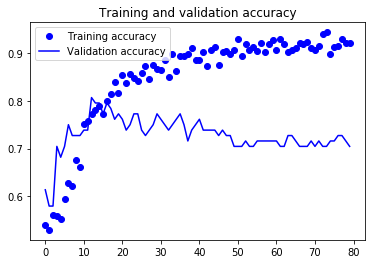

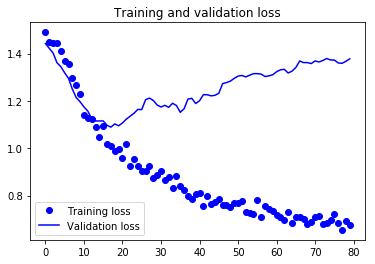

In [7]:
# Plot The Training Accuracy

accuracy = model_train1.history['acc']
val_accuracy = model_train1.history['val_acc']
loss = model_train1.history['loss']
val_loss = model_train1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [8]:
# Model Score Summary using Cross Validation

model.load_weights("weight_best1.hdf5")
y_pred1 = np.argmax(model.predict(valid_X1), axis=1)
y_true1 = np.argmax(valid_Y1, axis = 1)

model.load_weights("weight_best2.hdf5")
y_pred2 = np.argmax(model.predict(valid_X2), axis=1)
y_true2 = np.argmax(valid_Y2, axis = 1)

model.load_weights("weight_best3.hdf5")
y_pred3 = np.argmax(model.predict(valid_X3), axis=1)
y_true3 = np.argmax(valid_Y3, axis = 1)

model.load_weights("weight_best4.hdf5")
y_pred4 = np.argmax(model.predict(valid_X4), axis=1)
y_true4 = np.argmax(valid_Y4, axis = 1)

model.load_weights("weight_best5.hdf5")
y_pred5 = np.argmax(model.predict(valid_X5), axis=1)
y_true5 = np.argmax(valid_Y5, axis = 1)

def conf_matrix(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
    sensi = tp/(tp+fn)
    specificity = tn/(tn+fp)
    accu = (tn + tp)/(tn + tp + fn + fp)
    mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print('{} Result'.format(string_name))
    print('Accuracy :', accu)
    print('AUC :', auc)
    print('Sensitivity :', sensi)
    print('Specificity :', specificity)
    print('F1 :', f1)
    print('MCC :', mcc)
    print()
    return [auc, accu, mcc, f1, sensi, specificity]

auc1, accu1, mcc1, f11, sen1, spec1 = conf_matrix(y_true1, y_pred1)
auc2, accu2, mcc2, f12, sen2, spec2 = conf_matrix(y_true2, y_pred2)
auc3, accu3, mcc3, f13, sen3, spec3 = conf_matrix(y_true3, y_pred3)
auc4, accu4, mcc4, f14, sen4, spec4 = conf_matrix(y_true4, y_pred4)
auc5, accu5, mcc5, f15, sen5, spec5 = conf_matrix(y_true5, y_pred5)

accu = (accu1 + accu2 + accu3 + accu4 + accu5)/5
auc = (auc1 + auc2 + auc3 + auc4 + auc5)/5
f1 = (f11 + f12 + f13 + f14 + f15)/5
mcc = (mcc1 + mcc2 + mcc3 + mcc4 + mcc5)/5
sen = (sen1 + sen2 + sen3 + sen4 + sen5)/5
spec = (spec1 + spec2 + spec3 + spec4 + spec5)

print('{} Result'.format(string_name))
print('Accuracy :', accu)
print('AUC :', auc)
print('Sensitivity :', sen)
print('Specificity :', spec)
print('F1 :', f1)
print('MCC :', mcc)
    
with open('results/summary_{}.csv'.format(string_name), mode='w') as summary_file:
    employee_writer = csv.writer(summary_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['Accuracy :', accu])
    employee_writer.writerow(['AUC :', auc])
    employee_writer.writerow(['Sensitivity :', sen])
    employee_writer.writerow(['Specificity :', spec])
    employee_writer.writerow(['F1 :', f1])
    employee_writer.writerow(['MCC :', mcc])

PELM_y Result
Accuracy : 0.7840909090909091
AUC : 0.7913943355119826
Sensitivity : 0.7592592592592593
Specificity : 0.8235294117647058
F1 : 0.8118811881188118
MCC : 0.5688615521268232

PELM_y Result
Accuracy : 0.7640449438202247
AUC : 0.7616869918699186
Sensitivity : 0.7317073170731707
Specificity : 0.7916666666666666
F1 : 0.7407407407407408
MCC : 0.5244410062210421

PELM_y Result
Accuracy : 0.8295454545454546
AUC : 0.8245283018867925
Sensitivity : 0.8490566037735849
Specificity : 0.8
F1 : 0.8571428571428571
MCC : 0.6461027771035147

PELM_y Result
Accuracy : 0.7415730337078652
AUC : 0.7398648648648648
Sensitivity : 0.75
Specificity : 0.7297297297297297
F1 : 0.7722772277227722
MCC : 0.47530363042176793

PELM_y Result
Accuracy : 0.7191011235955056
AUC : 0.7199191102123357
Sensitivity : 0.7441860465116279
Specificity : 0.6956521739130435
F1 : 0.7191011235955057
MCC : 0.4398382204246714

PELM_y Result
Accuracy : 0.7676710929519918
AUC : 0.7674787208691789
Sensitivity : 0.7668418453235286
S

In [9]:
# Testing

print('Model Final')
model_train = model.fit(main_X, main_Y, epochs=100, batch_size=32, 
                        validation_data=(test_X, test_Y), callbacks=callback_list)
model.load_weights("model.hdf5")

Model Final
Train on 443 samples, validate on 50 samples
Epoch 1/100
443/443 [==============================] - 0s 96us/step - loss: 1.0871 - acc: 0.8014 - val_loss: 1.1134 - val_acc: 0.7800
Epoch 2/100
443/443 [==============================] - 0s 97us/step - loss: 1.0840 - acc: 0.7946 - val_loss: 1.1024 - val_acc: 0.8000
Epoch 3/100
443/443 [==============================] - 0s 100us/step - loss: 1.0409 - acc: 0.7991 - val_loss: 1.0888 - val_acc: 0.7800
Epoch 4/100
443/443 [==============================] - 0s 98us/step - loss: 1.0370 - acc: 0.8126 - val_loss: 1.0946 - val_acc: 0.7800
Epoch 5/100
443/443 [==============================] - 0s 96us/step - loss: 1.0202 - acc: 0.8284 - val_loss: 1.0794 - val_acc: 0.7600
Epoch 6/100
443/443 [==============================] - 0s 94us/step - loss: 0.9639 - acc: 0.8307 - val_loss: 1.0951 - val_acc: 0.7600
Epoch 7/100
443/443 [==============================] - 0s 95us/step - loss: 0.9504 - acc: 0.8352 - val_loss: 1.0988 - val_acc: 0.7600
Epoc

443/443 [==============================] - 0s 96us/step - loss: 0.6078 - acc: 0.9187 - val_loss: 1.3241 - val_acc: 0.7400
Epoch 62/100
443/443 [==============================] - 0s 90us/step - loss: 0.6080 - acc: 0.9165 - val_loss: 1.3208 - val_acc: 0.7400
Epoch 63/100
443/443 [==============================] - 0s 92us/step - loss: 0.6033 - acc: 0.9323 - val_loss: 1.3115 - val_acc: 0.7400
Epoch 64/100
443/443 [==============================] - 0s 89us/step - loss: 0.5837 - acc: 0.9300 - val_loss: 1.3056 - val_acc: 0.7400
Epoch 65/100
443/443 [==============================] - 0s 93us/step - loss: 0.5985 - acc: 0.9233 - val_loss: 1.3058 - val_acc: 0.7400
Epoch 66/100
443/443 [==============================] - 0s 90us/step - loss: 0.5972 - acc: 0.9233 - val_loss: 1.3112 - val_acc: 0.7400
Epoch 67/100
443/443 [==============================] - 0s 91us/step - loss: 0.6001 - acc: 0.9165 - val_loss: 1.3105 - val_acc: 0.7400
Epoch 68/100
443/443 [==============================] - 0s 89us/step

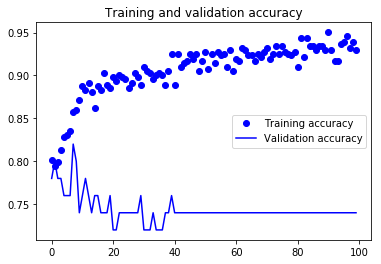

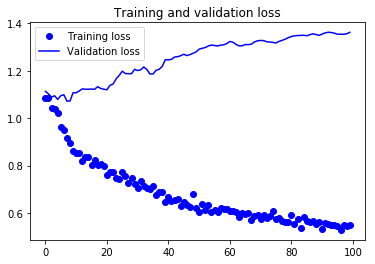

In [10]:
# Plot The Training Accuracy

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('results/Acc_result_{}.png'.format(string_name))
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('results/Loss_result_{}.png'.format(string_name))
plt.show()

In [11]:
model.load_weights("weight_best.hdf5")
y_pred_t = np.argmax(model.predict(test_X), axis=1)
y_true_t = np.argmax(test_Y, axis = 1)

def conf_matrix(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    f1 = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    auc = roc_auc_score(y_true, y_pred, average='macro', sample_weight=None, max_fpr=None)
    sensi = tp/(tp+fn)
    specificity = tn/(tn+fp)
    accu = (tn + tp)/(tn + tp + fn + fp)
    mcc = ((tp*tn)-(fp*fn))/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print('{} Result'.format(string_name))
    print('Accuracy :', accu)
    print('AUC :', auc)
    print('Sensitivity :', sensi)
    print('Specificity :', specificity)
    print('F1 :', f1)
    print('MCC :', mcc)
    print()
    return [auc, accu, mcc, f1, sensi, specificity]

auc_t, accu_t, mcc_t, f1_t, sen_t, spec_t = conf_matrix(y_true_t, y_pred_t)
    
with open('results/final_summary_{}.csv'.format(string_name), mode='w') as summary_file:
    employee_writer = csv.writer(summary_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['Accuracy :', accu_t])
    employee_writer.writerow(['AUC :', auc_t])
    employee_writer.writerow(['Sensitivity :', sen_t])
    employee_writer.writerow(['Specificity :', spec_t])
    employee_writer.writerow(['F1 :', f1_t])
    employee_writer.writerow(['MCC :', mcc_t])

PELM_y Result
Accuracy : 0.82
AUC : 0.8189102564102564
Sensitivity : 0.7916666666666666
Specificity : 0.8461538461538461
F1 : 0.8085106382978724
MCC : 0.63935928589601

